# UNIVERSIDAD TÉCNICA PARTICULAR DE LOJA

# PROYECTO FINAL - ANÁLISIS DE DATOS Y VISUALIZACIÓN

INTEGRANTES

*   Henry Guarnizo
*   Eduardo Araujo
*   Astrid Medina




In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import classification_report
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# 1. Carga de datos:

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv',sep=',')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# Mostrar las primeras filas del dataset
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 2. EDA



**Información del dataset**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Resumen estadístico de las columnas numéricas

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Comprobemos si hay valores nulos en este conjunto de datos

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Por lo tanto, podemos decir que no hay valores nulos en el conjunto de datos

Ahora vamos a analizar cuántos valores distintos existen por cada característica de la variable "Target"


In [ ]:
df['Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

In [ ]:
x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target',
             values ='Count_T',
            title='Cuantos abandonos, matriculados & graduados existen en la columna "Target"')

fig.update_traces(labels=['Graduate (graduados)','Dropout(retirados)','Enrolled(matriculados)'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()


* El **49,93%** de estudiantes tienen el estado de graduado.
* El **32,12%** de estudiantes tienen el estado de abandono (dropout).
* El **17,95%** de estudiantes pertenecen al estado matriculados.


## Distribución de la edad de los estudiantes en el momento de la inscripción (matrícula)

In [ ]:
px.histogram(df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['lightblue'])

## Número de estudiantes por sexo

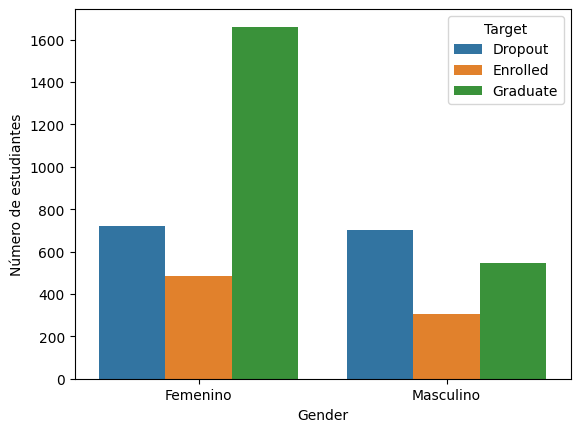

In [ ]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])
plt.ylabel('Número de estudiantes')
plt.show()

* Existe una distribución similar entre los estudiantes que abandonan sus estudios, tanto masculino y femenino, sin embargo la cantidad de graduados, predomina el género femenino.

## Histogramas - repesentaciones visuales de la distribución de cada una de las variables

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



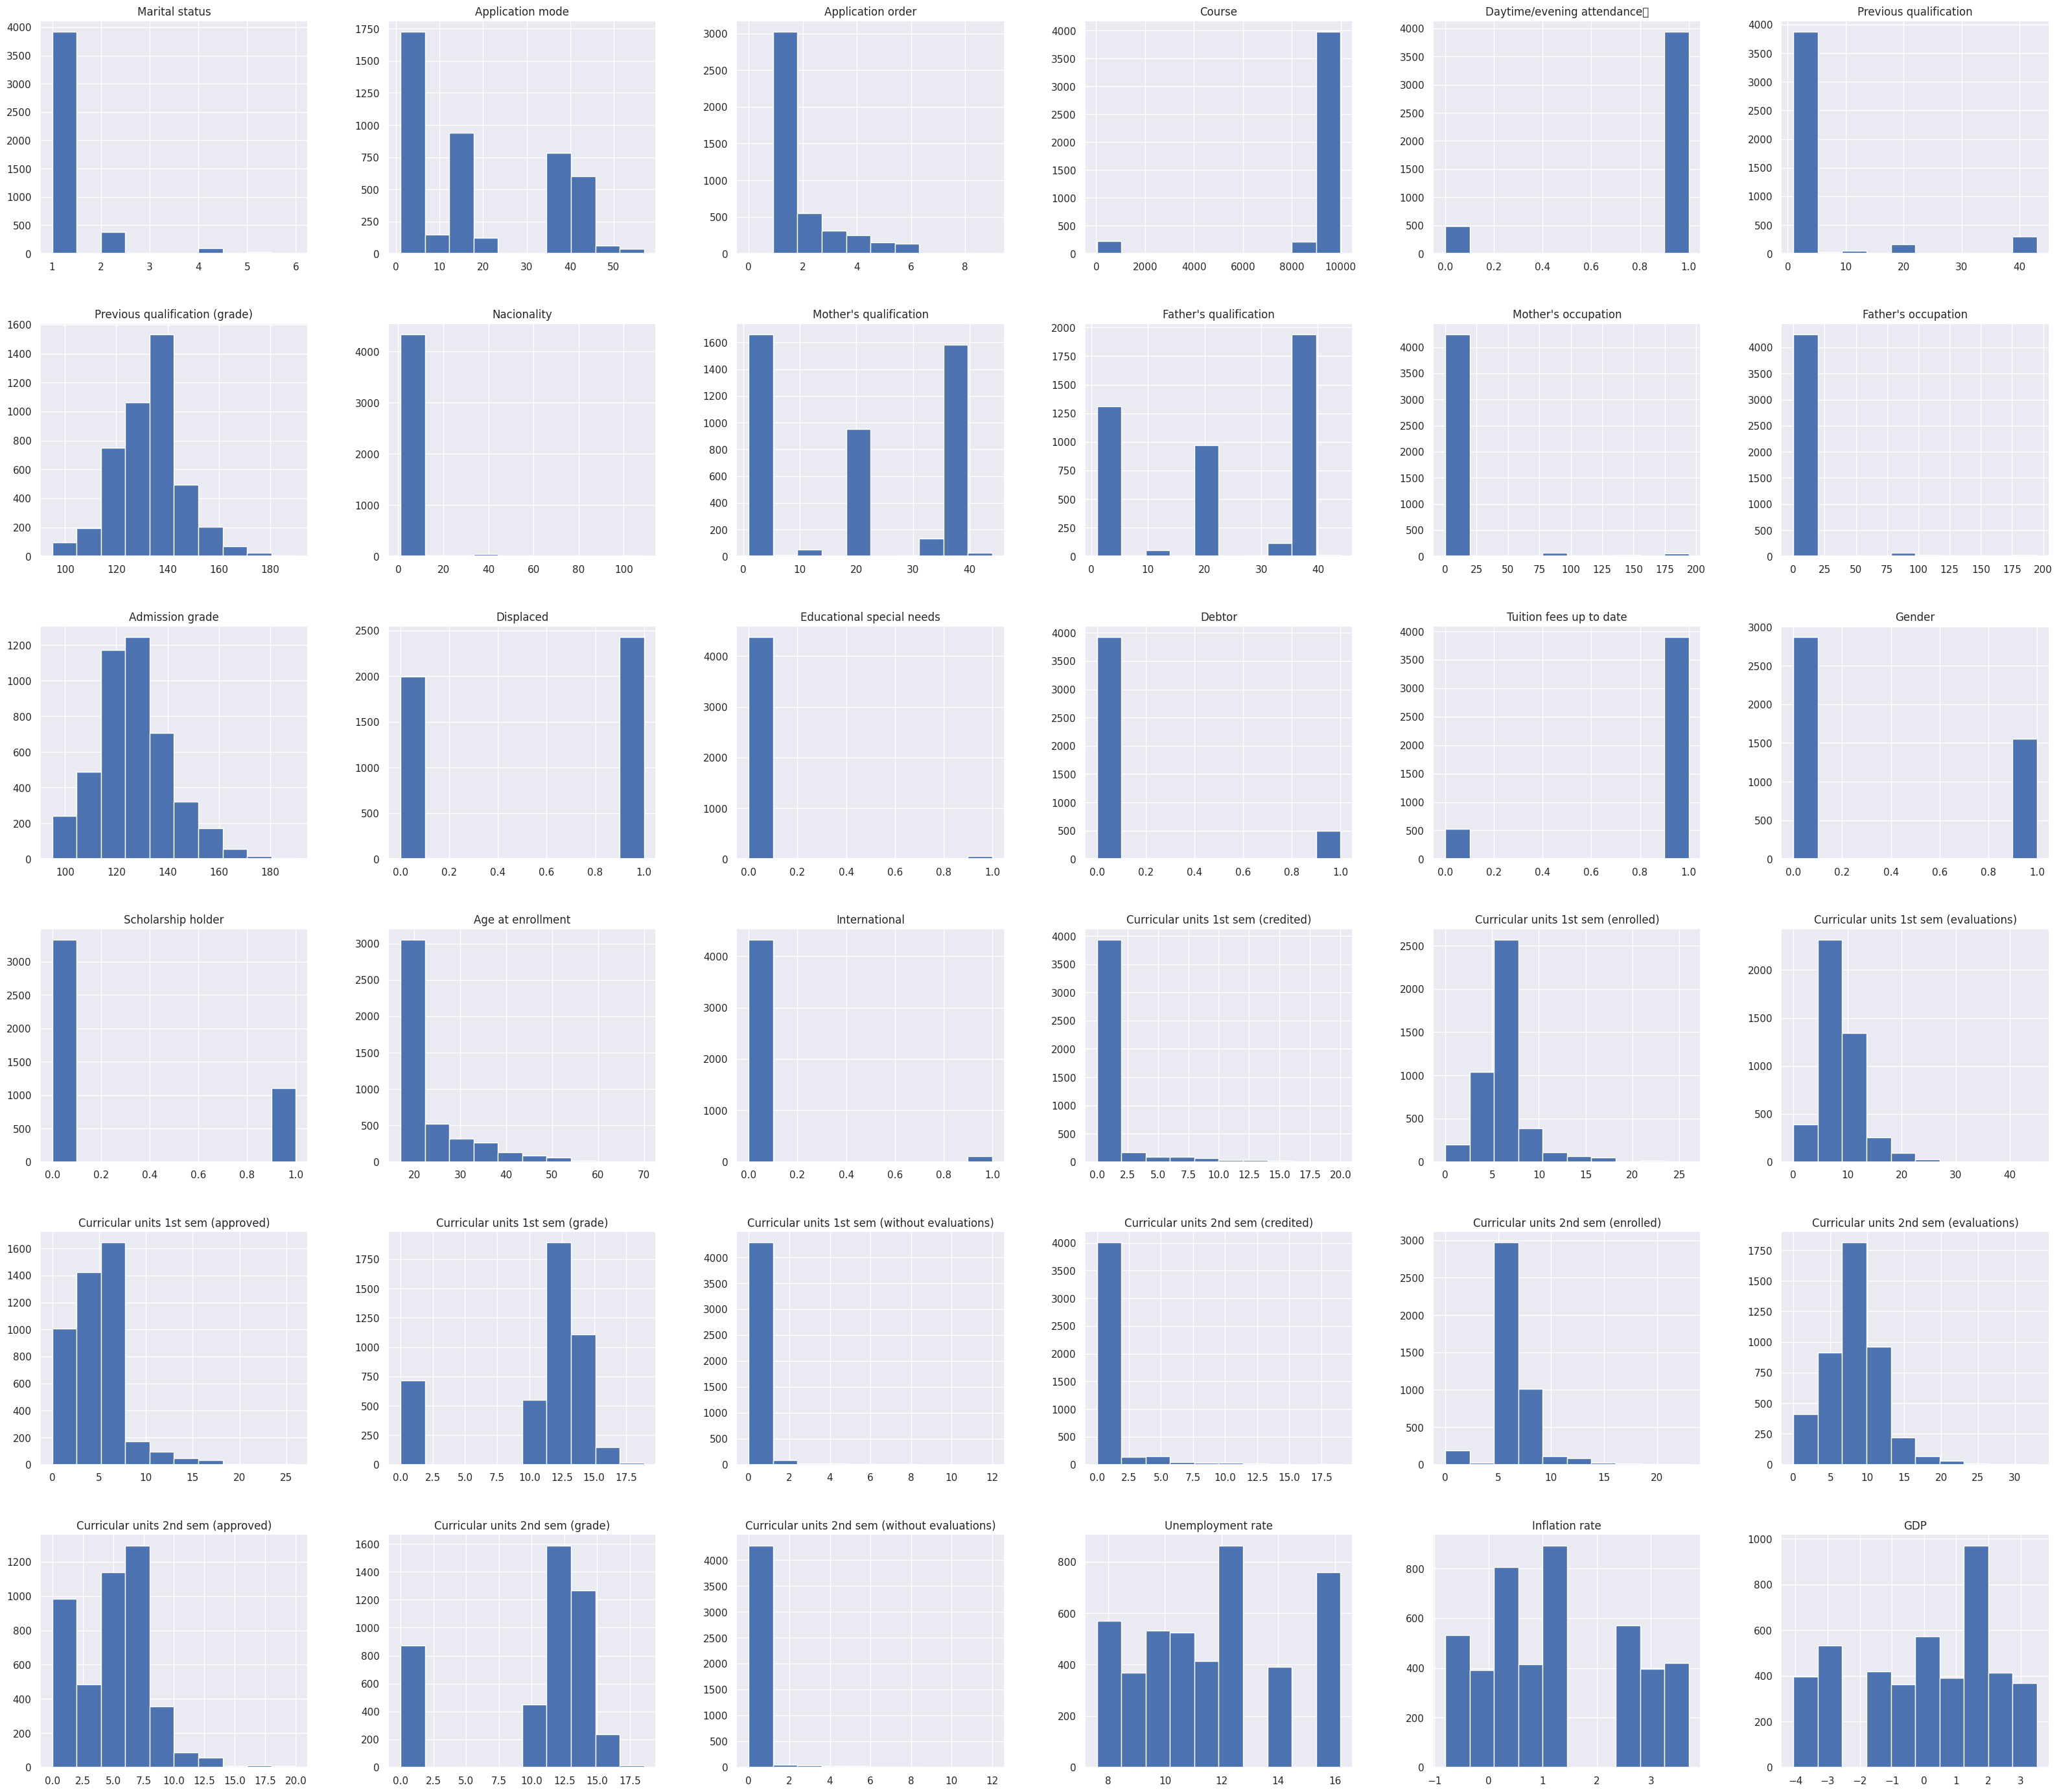

In [ ]:
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(40, 35), grid=True, legend=None);

## **3. PREPARACIÓN DE DATOS**

## Codificación de la columna target

Ya que es el único campo no numérico del conjunto de datos.

In [ ]:
print(df['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


**Selección de variables**

En vista que la variable a predecir tiene 3 valores:
- Dropout (abandono)
- Graduate (graduado)
- Enrolled (matriculado)
nos quedaremos con solo dos de los tres valores únicos de la variable objetivo antes de proceder con el modelo predictivo. Esto es útil cuando deseas simplificar el problema y enfocarnos en una clasificación binaria


In [ ]:
df = df[df.Target!='Enrolled']

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df['Target'].value_counts()


<ipython-input-162-ad1808a1de4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = encoder.fit_transform(df['Target'])


Target
1    2209
0    1421
Name: count, dtype: int64

Luego de la codificación tenemos los siguientes valores para la variable target:

* Dropout (Abandono) - 0
* Graduate (Graduado) - 1


## Análisis de correlación de variables con la variable **"Target"**

En éste paso, vamos a:
* Identificar cómo las características se correlacionan con la variable a predecir (Target).
* Eliminar otras características no deseadas o irrelevantes de los datos

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.274985,-0.130370,0.042012,-0.265823,0.070984,-0.038869,-0.008899,0.185117,0.124995,...,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,-0.100479
Application mode,0.274985,1.000000,-0.287245,0.063112,-0.310854,0.416666,-0.071190,-0.011711,0.122697,0.098216,...,0.244575,0.130559,0.163626,-0.085270,-0.137288,0.060434,0.072870,-0.021895,-0.023945,-0.244507
Application order,-0.130370,-0.287245,1.000000,0.056238,0.165494,-0.187881,-0.051715,-0.026706,-0.058649,-0.055254,...,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Course,0.042012,0.063112,0.056238,1.000000,-0.033887,-0.000230,-0.081792,-0.036492,0.039976,0.043931,...,-0.078037,0.415262,0.281016,0.199739,0.335016,0.033454,0.010375,0.027855,-0.014411,0.038135
Daytime/evening attendance\t,-0.265823,-0.310854,0.165494,-0.033887,1.000000,-0.087616,0.063810,0.030334,-0.188876,-0.135725,...,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,0.084496
Previous qualification,0.070984,0.416666,-0.187881,-0.000230,-0.087616,1.000000,0.089194,-0.025211,-0.021399,0.003865,...,0.147389,0.054375,0.094175,-0.010854,-0.008933,0.022257,0.102451,-0.070746,0.072121,-0.062323
Previous qualification (grade),-0.038869,-0.071190,-0.051715,-0.081792,0.063810,0.089194,1.000000,0.053888,-0.073035,-0.047147,...,-0.026107,-0.036162,-0.061730,0.055232,0.068240,-0.023654,0.043345,0.019247,-0.054349,0.109464
Nacionality,-0.008899,-0.011711,-0.026706,-0.036492,0.030334,-0.025211,0.053888,1.000000,-0.038168,-0.073033,...,-0.004657,-0.029476,-0.032890,-0.024523,-0.014859,-0.014388,0.003110,-0.005440,0.017080,-0.015516
Mother's qualification,0.185117,0.122697,-0.058649,0.039976,-0.188876,-0.021399,-0.073035,-0.038168,1.000000,0.543890,...,0.041687,0.033219,0.033510,-0.026406,-0.034434,0.029799,-0.122171,0.057987,-0.076342,-0.053989
Father's qualification,0.124995,0.098216,-0.055254,0.043931,-0.135725,0.003865,-0.047147,-0.073033,0.543890,1.000000,...,0.047034,0.029756,0.014678,0.001245,-0.008768,0.004103,-0.075372,0.062772,-0.059914,-0.005865


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


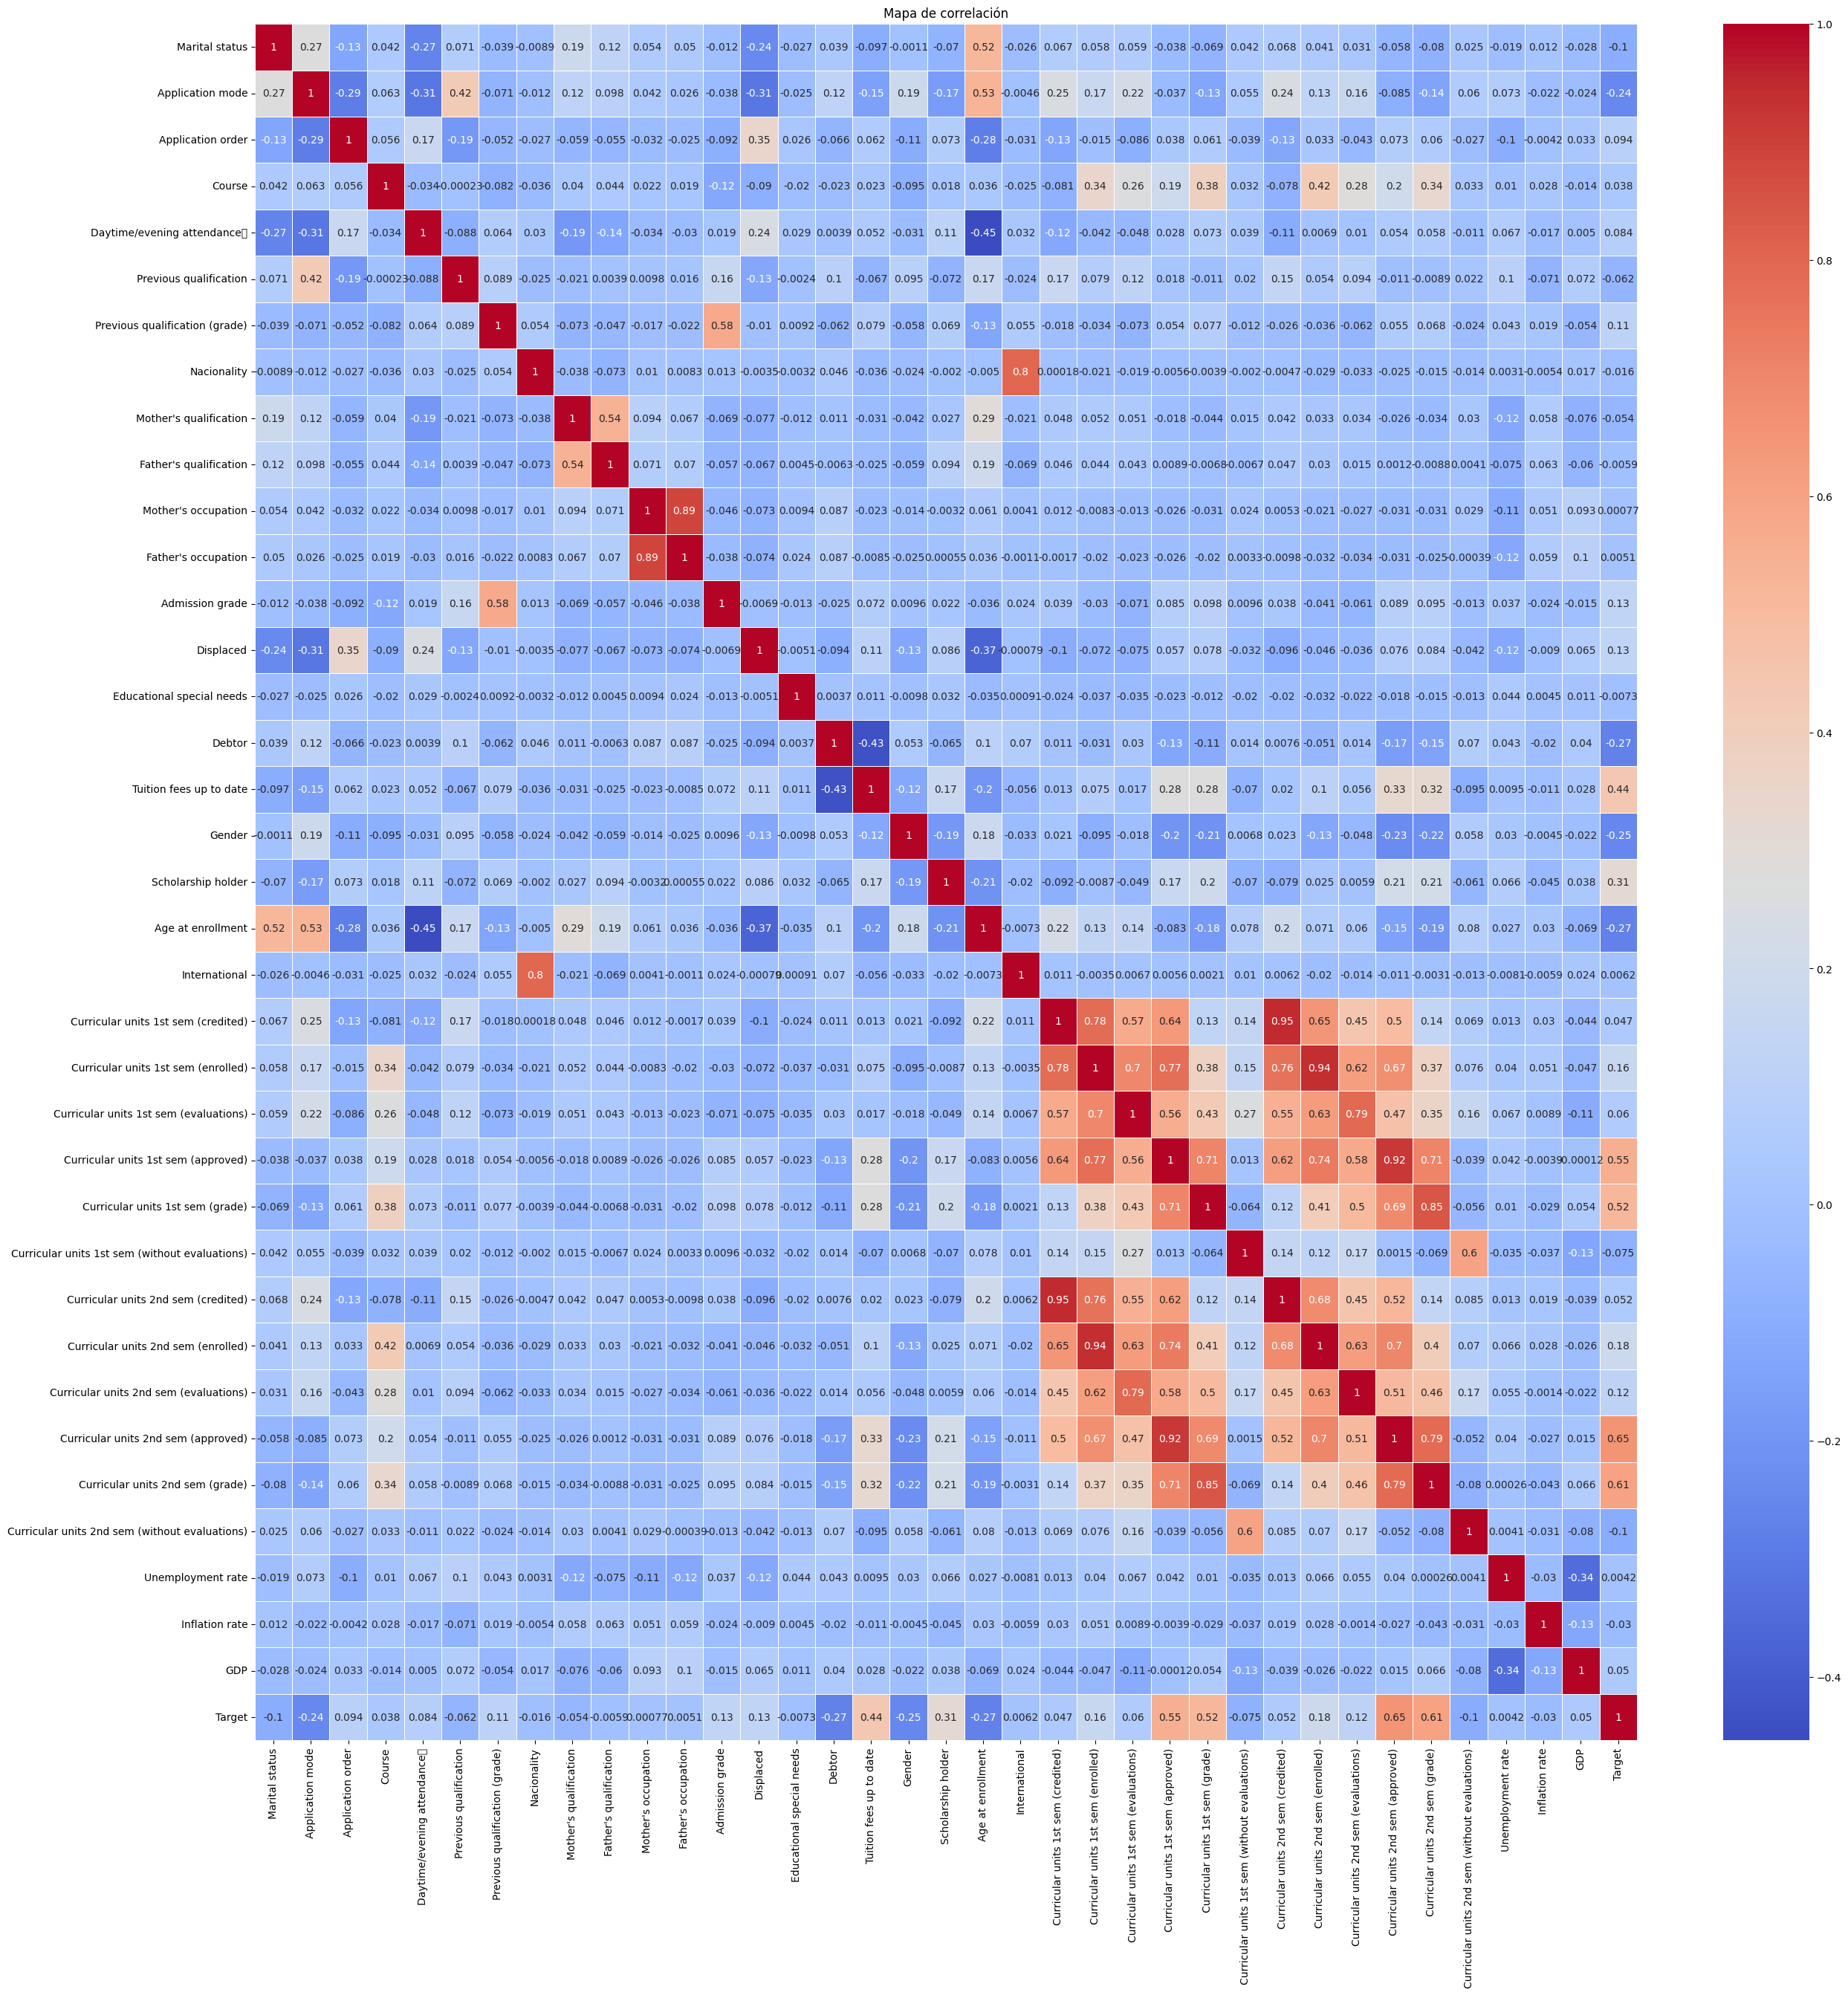

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de correlación')
plt.show()

In [ ]:
#Realizamos una copia del archivo antes de decidir que variables eliminar, para cada modelo de predicción
df_decision_tree = df.copy()
df_random_forest=df.copy()

In [ ]:
df_decision_tree

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [ ]:
df_random_forest

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


## Selección de características

* La selección de características es un proceso esencial en el análisis de datos y el aprendizaje automático, centrado en elegir el subconjunto de características más relevante del conjunto de datos original.
* El objetivo principal es mejorar el rendimiento del modelo, reducir la complejidad y mejorar la interpretabilidad.

* Al eliminar características irrelevantes, redundantes o ruidosas, la selección de características ayuda a evitar el sobreajuste y permite al modelo generalizar mejor a nuevos datos.

* Esto, a su vez, reduce el tiempo de cálculo y los requisitos de memoria durante el entrenamiento y la evaluación del modelo.

* Se pueden emplear varias técnicas para la selección de características, incluidos los métodos de filtro que clasifican las características basándose en medidas estadísticas, l

* En última instancia, la selección de las características adecuadas es fundamental para producir modelos más eficaces y precisos, que faciliten la comprensión de los datos y la toma de decisiones con mayor claridad y eficacia.

**Para iniciar con el análisis de los algoritmos de predicción, eliminaremos de los datasets algunas columnas o características que tienen muy baja correlación la variable a predecir.**

In [ ]:
df_random_forest.drop(['International',
                'Nacionality',
                "Father's qualification",
                'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (approved)','Course',
                'Educational special needs','Unemployment rate',
                'Inflation rate'],axis=1,inplace=True)

In [ ]:
df_decision_tree.drop(['International',
                'Nacionality',
                "Father's qualification",
                'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (approved)','Course',
                'Educational special needs','Unemployment rate',
                'Inflation rate'],axis=1,inplace=True)

In [ ]:
df_random_forest

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,17,5,1,1,122.0,19,5,9,127.3,...,0.000000,0,0,0,0,0,0.000000,0,1.74,0
1,1,15,1,1,1,160.0,1,3,3,142.5,...,14.000000,0,0,6,6,6,13.666667,0,0.79,1
2,1,1,5,1,1,122.0,37,9,9,124.8,...,0.000000,0,0,6,0,0,0.000000,0,1.74,0
3,1,17,2,1,1,122.0,38,5,3,119.6,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,1
4,2,39,1,0,1,100.0,37,9,9,141.5,...,12.333333,0,0,6,6,6,13.000000,0,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125.0,1,5,4,122.2,...,13.600000,0,0,6,8,5,12.666667,0,-4.06,1
4420,1,1,2,1,1,120.0,1,9,9,119.0,...,12.000000,0,0,6,6,2,11.000000,0,2.02,0
4421,1,1,1,1,1,154.0,37,9,9,149.5,...,14.912500,0,0,8,9,1,13.500000,0,0.79,0
4422,1,1,1,1,1,180.0,37,7,4,153.8,...,13.800000,0,0,5,6,5,12.000000,0,-3.12,1


In [ ]:
df_decision_tree

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,17,5,1,1,122.0,19,5,9,127.3,...,0.000000,0,0,0,0,0,0.000000,0,1.74,0
1,1,15,1,1,1,160.0,1,3,3,142.5,...,14.000000,0,0,6,6,6,13.666667,0,0.79,1
2,1,1,5,1,1,122.0,37,9,9,124.8,...,0.000000,0,0,6,0,0,0.000000,0,1.74,0
3,1,17,2,1,1,122.0,38,5,3,119.6,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,1
4,2,39,1,0,1,100.0,37,9,9,141.5,...,12.333333,0,0,6,6,6,13.000000,0,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125.0,1,5,4,122.2,...,13.600000,0,0,6,8,5,12.666667,0,-4.06,1
4420,1,1,2,1,1,120.0,1,9,9,119.0,...,12.000000,0,0,6,6,2,11.000000,0,2.02,0
4421,1,1,1,1,1,154.0,37,9,9,149.5,...,14.912500,0,0,8,9,1,13.500000,0,0.79,0
4422,1,1,1,1,1,180.0,37,7,4,153.8,...,13.800000,0,0,5,6,5,12.000000,0,-3.12,1


## Analizamos los mapas de correlación resultantes

In [ ]:
corr_matrix = df_decision_tree.corr()
corr_matrix

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
Marital status,1.000000,0.274985,-0.130370,-0.265823,0.070984,-0.038869,0.185117,0.053892,0.050499,-0.012440,...,-0.069442,0.041535,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.028391,-0.100479
Application mode,0.274985,1.000000,-0.287245,-0.310854,0.416666,-0.071190,0.122697,0.041650,0.025629,-0.038311,...,-0.133919,0.054923,0.244575,0.130559,0.163626,-0.085270,-0.137288,0.060434,-0.023945,-0.244507
Application order,-0.130370,-0.287245,1.000000,0.165494,-0.187881,-0.051715,-0.058649,-0.032459,-0.025308,-0.092324,...,0.060776,-0.038958,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,0.033031,0.094355
Daytime/evening attendance\t,-0.265823,-0.310854,0.165494,1.000000,-0.087616,0.063810,-0.188876,-0.034175,-0.030082,0.018610,...,0.073270,0.039307,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.005007,0.084496
Previous qualification,0.070984,0.416666,-0.187881,-0.087616,1.000000,0.089194,-0.021399,0.009810,0.015577,0.164962,...,-0.010938,0.020155,0.147389,0.054375,0.094175,-0.010854,-0.008933,0.022257,0.072121,-0.062323
Previous qualification (grade),-0.038869,-0.071190,-0.051715,0.063810,0.089194,1.000000,-0.073035,-0.017383,-0.022169,0.577241,...,0.077191,-0.011857,-0.026107,-0.036162,-0.061730,0.055232,0.068240,-0.023654,-0.054349,0.109464
Mother's qualification,0.185117,0.122697,-0.058649,-0.188876,-0.021399,-0.073035,1.000000,0.093654,0.067471,-0.068855,...,-0.044137,0.015112,0.041687,0.033219,0.033510,-0.026406,-0.034434,0.029799,-0.076342,-0.053989
Mother's occupation,0.053892,0.041650,-0.032459,-0.034175,0.009810,-0.017383,0.093654,1.000000,0.886568,-0.045505,...,-0.030965,0.024175,0.005302,-0.020567,-0.026873,-0.031209,-0.030782,0.028571,0.093200,0.000772
Father's occupation,0.050499,0.025629,-0.025308,-0.030082,0.015577,-0.022169,0.067471,0.886568,1.000000,-0.038096,...,-0.020283,0.003253,-0.009842,-0.032043,-0.033926,-0.030994,-0.025479,-0.000395,0.102032,0.005066
Admission grade,-0.012440,-0.038311,-0.092324,0.018610,0.164962,0.577241,-0.068855,-0.045505,-0.038096,1.000000,...,0.097693,0.009637,0.038345,-0.040766,-0.060954,0.089429,0.095342,-0.012823,-0.014624,0.128058


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


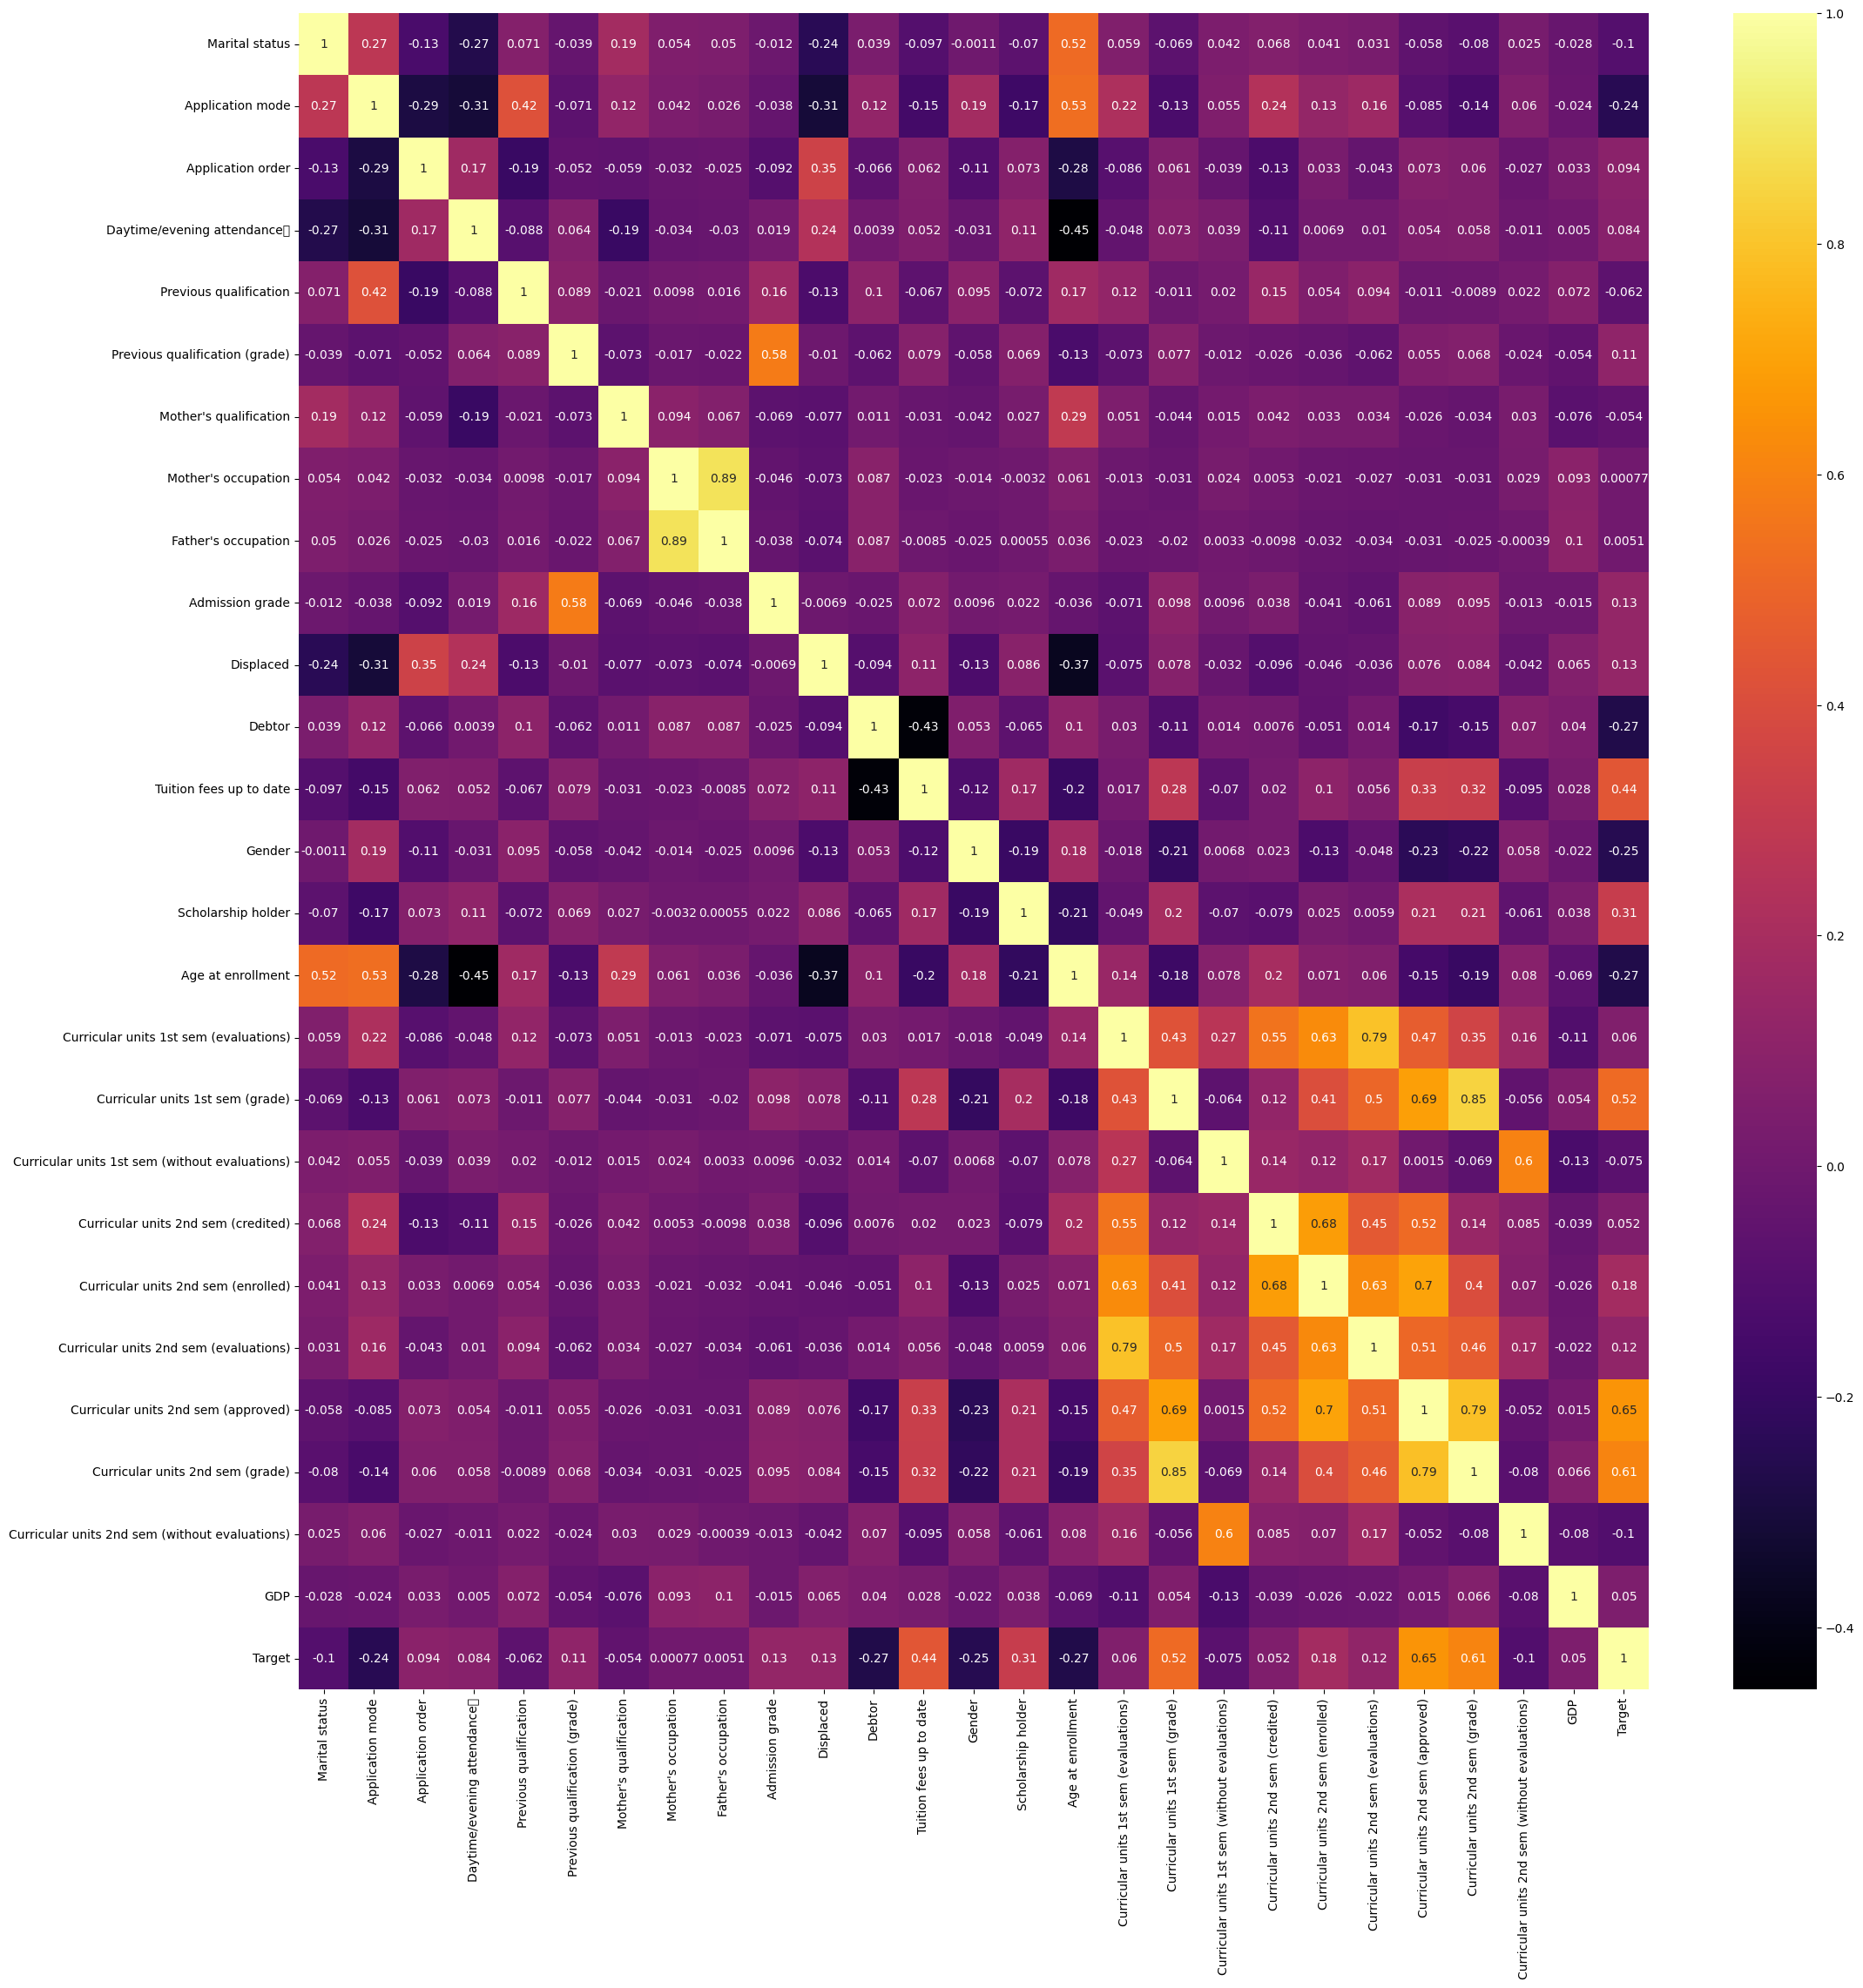

In [ ]:
plt.figure(figsize = (25, 25))
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'inferno')

**Correlación de tasa de graduados**

In [ ]:
dataset  = df_decision_tree.drop('Target', axis = 1)

In [ ]:
dataset.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP
0,1,17,5,1,1,122.0,19,5,9,127.3,...,0,0.000000,0,0,0,0,0,0.000000,0,1.74
1,1,15,1,1,1,160.0,1,3,3,142.5,...,6,14.000000,0,0,6,6,6,13.666667,0,0.79
2,1,1,5,1,1,122.0,37,9,9,124.8,...,0,0.000000,0,0,6,0,0,0.000000,0,1.74
3,1,17,2,1,1,122.0,38,5,3,119.6,...,8,13.428571,0,0,6,10,5,12.400000,0,-3.12
4,2,39,1,0,1,100.0,37,9,9,141.5,...,9,12.333333,0,0,6,6,6,13.000000,0,0.79


<Axes: title={'center': 'Correlación con "Dropout"'}>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


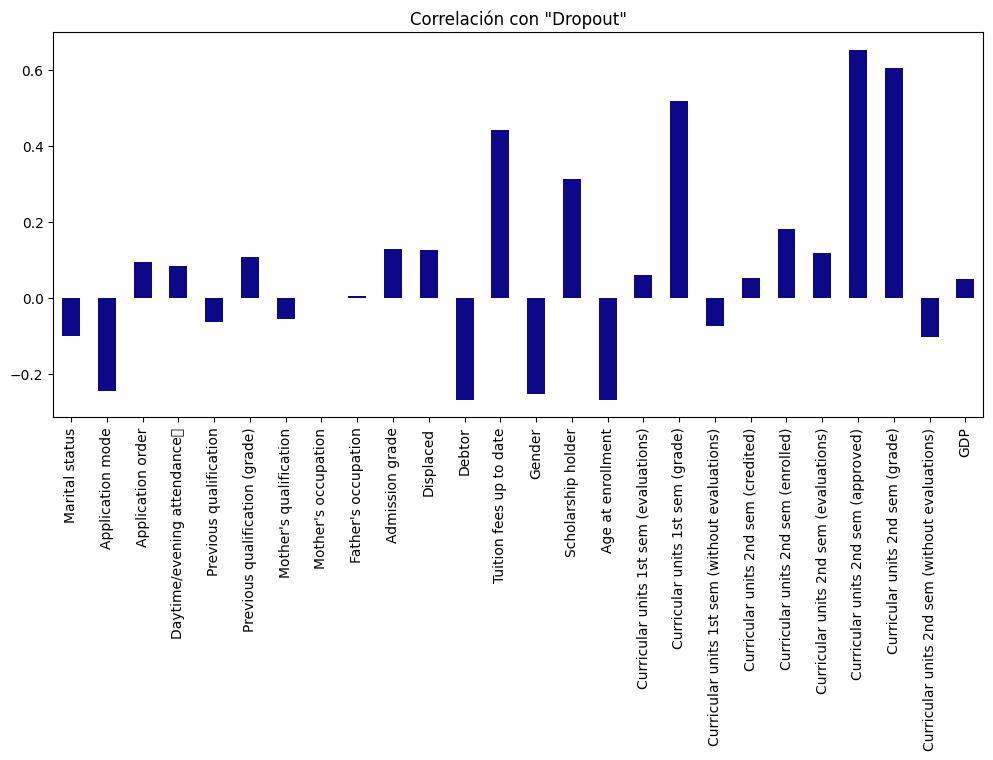

In [ ]:
dataset.corrwith(df_decision_tree['Target']).plot.bar(
    title = 'Correlación con "Dropout"',
    figsize = (12, 5) ,
    cmap = 'plasma'
)

In [ ]:
df_decision_tree.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,17,5,1,1,122.0,19,5,9,127.3,...,0.000000,0,0,0,0,0,0.000000,0,1.74,0
1,1,15,1,1,1,160.0,1,3,3,142.5,...,14.000000,0,0,6,6,6,13.666667,0,0.79,1
2,1,1,5,1,1,122.0,37,9,9,124.8,...,0.000000,0,0,6,0,0,0.000000,0,1.74,0
3,1,17,2,1,1,122.0,38,5,3,119.6,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,1
4,2,39,1,0,1,100.0,37,9,9,141.5,...,12.333333,0,0,6,6,6,13.000000,0,0.79,1


# **4. Análisis predictivo**

## DIVIDIR CONJUNTO DE DATOS

Por división de un conjunto de datos se entiende el proceso de dividir un conjunto de datos determinado en dos o más subconjuntos con fines de entrenamiento y evaluación.

* El tipo de división más común es entre el conjunto de entrenamiento y el conjunto de prueba (o validación). Esta división nos permite evaluar el rendimiento de un modelo de aprendizaje automático en datos no vistos y evaluar su capacidad de generalización.

**División entrenamiento-prueba**
Se trata del tipo de división más básico, en el que el conjunto de datos se divide en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo de aprendizaje automático, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento.
La división suele realizarse utilizando una proporción fija, como el **80%** para el entrenamiento y el **20%** para las pruebas.

In [ ]:
x = df_random_forest.drop('Target', axis = 1)
y = df_random_forest['Target']

In [ ]:
x1 = df_decision_tree.drop('Target', axis = 1)
y1 = df_decision_tree['Target']

In [ ]:
x.shape, y.shape

((3630, 26), (3630,))

In [ ]:
x1.shape, y1.shape

((3630, 26), (3630,))

**Datos de entrenamiento y datos de prueba**

**Random Forest**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2541, 26), (1089, 26), (2541,), (1089,))

**Decision Tree**

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,
                                                    y1,
                                                    test_size = 0.3,
                                                    stratify = y1,
                                                    random_state = 42)

In [ ]:
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((2541, 26), (1089, 26), (2541,), (1089,))

## Escalado de Datos


El escalado es una técnica de preprocesamiento utilizada en el aprendizaje automático para transformar las características de entrada a una escala similar.

Frecuentemente es necesario porque las características pueden tener diferentes unidades, rangos o magnitudes, lo que puede afectar al rendimiento de determinados algoritmos. El escalado garantiza que todas las características contribuyan por igual al proceso de aprendizaje y evita que las características con valores más grandes dominen a las que tienen valores más pequeños.

StandardScaler es un método comúnmente utilizado para escalar características numéricas en el aprendizaje automático. Forma parte del módulo de preprocesamiento de scikit-learn, una popular biblioteca de aprendizaje automático en Python.



In [ ]:
scaler = StandardScaler()



In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.3002885 , -0.99691783, -0.56574082, ...,  0.54376269,
        -0.18874023,  0.79649683],
       [-0.3002885 , -0.12941428,  0.18220269, ...,  0.39318043,
        -0.18874023,  0.77418582],
       [-0.3002885 , -0.12941428,  0.18220269, ...,  0.39318043,
        -0.18874023, -1.39444413],
       ...,
       [-0.3002885 , -0.64991641, -0.56574082, ..., -1.80532043,
        -0.18874023,  0.35027667],
       [-0.3002885 , -0.99691783, -0.56574082, ...,  0.64917026,
        -0.18874023,  1.56399549],
       [ 1.37670726,  1.20075784, -0.56574082, ..., -1.80532043,
        -0.18874023, -0.41275979]])

In [ ]:
x_test

array([[-0.3002885 , -0.99691783,  0.18220269, ...,  0.31272649,
        -0.18874023, -0.76081151],
       [-0.3002885 , -0.07158071, -0.56574082, ...,  0.18236528,
        -0.18874023,  0.35027667],
       [-0.3002885 ,  1.48992569, -0.56574082, ...,  0.15655118,
        -0.18874023, -1.81389107],
       ...,
       [-0.3002885 , -0.99691783,  0.18220269, ...,  0.430826  ,
        -0.18874023,  0.35027667],
       [-0.3002885 , -0.07158071, -0.56574082, ...,  0.18236528,
        -0.18874023,  0.1405532 ],
       [-0.3002885 , -0.07158071,  0.18220269, ...,  0.42329688,
        -0.18874023,  0.35027667]])

## Selección de modelo y entrenamiento

**Selección del modelo:**

La selección del modelo implica elegir el mejor algoritmo para el problema y el conjunto de datos dados. Este paso requiere una cuidadosa consideración de varios factores, como la naturaleza de los datos (por ejemplo, numéricos o categóricos), el tipo de problema (por ejemplo, regresión, clasificación, agrupación), la cantidad de datos disponibles y el rendimiento deseado del modelo. Es esencial seleccionar un modelo que pueda capturar eficazmente los patrones subyacentes en los datos y hacer predicciones precisas.

**Entrenamiento del modelo:**

Una vez seleccionado el modelo adecuado, el siguiente paso es entrenarlo en el conjunto de datos. El entrenamiento del modelo consiste en ajustar los parámetros del modelo utilizando los datos de entrenamiento para hacer predicciones precisas sobre datos no vistos. El objetivo es minimizar la diferencia entre las predicciones del modelo y los valores reales durante el entrenamiento.

In [ ]:
x_train.shape, x_test.shape

((2541, 26), (1089, 26))

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
clf.score(x_test, y_test)

0.9044995408631772

## Mejorando el modelo con Hyper-parameter Tuning

El ajuste de hiperparámetros es un proceso crítico en el aprendizaje automático que implica encontrar el conjunto óptimo de hiperparámetros para un modelo dado. Los hiperparámetros son ajustes de configuración que no se aprenden de los datos durante el entrenamiento del modelo, sino que se establecen antes de que comience el proceso de entrenamiento. Tienen un impacto significativo en el rendimiento del modelo y en su capacidad de generalización.

El objetivo del ajuste de hiperparámetros es buscar sistemáticamente entre distintas combinaciones de hiperparámetros para identificar la configuración que produce el mejor rendimiento del modelo. El proceso garantiza que el modelo esté bien optimizado y sea capaz de realizar predicciones precisas sobre datos nuevos y desconocidos.

**Grid Search:**

Grid search consiste en especificar una lista de valores para cada hiperparámetro. A continuación, el algoritmo prueba exhaustivamente todas las combinaciones posibles de hiperparámetros para encontrar la mejor. Este método es sencillo y puede ser eficaz para un número reducido de hiperparámetros, pero se vuelve costoso desde el punto de vista informático a medida que aumenta el número de hiperparámetros.

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4],
}

In [ ]:
clf_grid=GridSearchCV(estimator=clf,
                     param_grid=param_grid,
                     cv=3,
                     verbose=0,
                     n_jobs=-1,
                     return_train_score=False)

In [ ]:
clf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100]})

In [ ]:
clf_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
random_forest = RandomForestClassifier(**clf_grid.best_params_)

In [ ]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=4, n_estimators=50)

## Metrícas de evaluación del modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy_score: ', accuracy_score)

Accuracy_score:  0.9044995408631772


In [ ]:
precision_score = precision_score(y_test, y_pred)
print('Precision_score: ', precision_score)

Precision_score:  0.8909090909090909


In [ ]:
f1_score = f1_score(y_test, y_pred)
print('f1_score: ', f1_score)

f1_score:  0.9245283018867925


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       426
           1       0.89      0.96      0.92       663

    accuracy                           0.90      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.91      0.90      0.90      1089



**Matríz de confusión final**

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix

array([[348,  78],
       [ 26, 637]])

<Axes: >

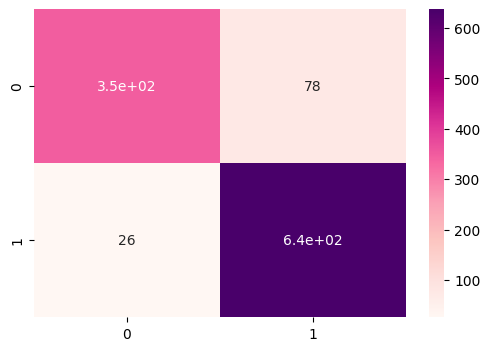

In [ ]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix,
            annot = True,
            cmap = 'RdPu')

## MODELO PREDICTIVO CON ÁRBOLES DE DECISIÓN
  

In [ ]:
# Codificar la variable objetivo
label_encoder = LabelEncoder()
df_decision_tree['Target'] = label_encoder.fit_transform(df_decision_tree['Target'])

In [ ]:
# Codificar otras variables categóricas si es necesario
for column in df.select_dtypes(include=['object', 'category']).columns:
    df_decision_tree[column] = LabelEncoder().fit_transform(df_decision_tree[column])

In [ ]:
X = df_decision_tree.drop('Target', axis=1)
y = df_decision_tree['Target']

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

In [ ]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [ ]:
# Entrenar el modelo usando GridSearchCV
grid_search.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, 32],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

In [ ]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [ ]:
# Entrenar el modelo usando GridSearchCV
grid_search.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, 32],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_ = best_model.predict(x1_test)

In [ ]:
# Entrenar el modelo usando GridSearchCV
grid_search.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, 32],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_ = best_model.predict(x1_test)

In [ ]:
# Calcular las métricas de rendimiento
accuracy = accuracy_score(y1_test, y_pred_)
report = classification_report(y1_test, y_pred_)

In [ ]:
# Imprimir resultados
print("Mejores hiperparámetros:", best_params)
print("Precisión:", accuracy)
print("Reporte de clasificación:\n", report)

Mejores hiperparámetros: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
Precisión: 0.8856749311294766
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.82      0.84       277
           1       0.89      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



OPTIMIZACIÓN USANDO OPTUNA

In [ ]:
def dtree_objective(trial):

    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_samples_leaf', 1, 32)
    crit = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])

    clf =  DecisionTreeClassifier(max_depth=md, min_samples_leaf=mi,criterion=crit, random_state=42, )
    scores = cross_val_score(clf, x1_train, y1_train, cv=10, scoring='f1_weighted')

    return scores.mean()

dtree_study = optuna.create_study(direction='maximize')
dtree_study.optimize(dtree_objective, n_trials=20)

[I 2024-05-31 22:14:50,550] A new study created in memory with name: no-name-885eda61-3d56-4900-959a-c2c4a99587af
[I 2024-05-31 22:14:51,019] Trial 0 finished with value: 0.9026635195168449 and parameters: {'max_depth': 4, 'min_samples_leaf': 13, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.9026635195168449.
[I 2024-05-31 22:14:51,502] Trial 1 finished with value: 0.8868885390162029 and parameters: {'max_depth': 57, 'min_samples_leaf': 30, 'criterion': 'gini'}. Best is trial 0 with value: 0.9026635195168449.
[I 2024-05-31 22:14:51,755] Trial 2 finished with value: 0.8863844160924181 and parameters: {'max_depth': 14, 'min_samples_leaf': 23, 'criterion': 'gini'}. Best is trial 0 with value: 0.9026635195168449.
[I 2024-05-31 22:14:52,158] Trial 3 finished with value: 0.89273015627015 and parameters: {'max_depth': 25, 'min_samples_leaf': 30, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.9026635195168449.
[I 2024-05-31 22:14:52,556] Trial 4 finished with value: 0.886314

In [ ]:
print(dtree_study.best_value)
print(dtree_study.best_params)

0.9026635195168449
{'max_depth': 4, 'min_samples_leaf': 13, 'criterion': 'log_loss'}


**Conclusión**

Podemos decir que, predecir la tasa de éxito de los estudiantes utilizando modelos basados en datos permite intervenciones oportunas y apoyo personalizado.

Esto permite a los educadores ayudar de forma proactiva a los estudiantes que se enfrentan a desafíos, fomentando un entorno de aprendizaje más equitativo y exitoso, manteniendo al mismo tiempo las consideraciones éticas.